**About Dataset**

*List of unicorn startup companies*

This is a list of unicorn startup companies. In finance, a unicorn is a privately held startup company with a current valuation of US$1 billion or more, across technology centers throughout the world.

Notable lists of unicorn companies are maintained by The Wall Street Journal Fortune Magazine CNNMoney/CB Insights TechCrunch PitchBook/Morningstar and Tech in Asia.

Topics covered in this dataset:

1.    check the different unicorn startups in industry sectors
2.    Yearly companies joined unicorn club
3.    You can check for other countries as well.
4.    Number of US startups count
5.    Line graph - US Based Companies
6.    Extract some columns from US_unicorn startups
7.    How many fintech comapny in ths US?
8.    Most valued unicorn based country
9.    How you can access a specific company?
10.   Based on valuation which company has most valuation?
11.   Which city has most valuation startups in world?
12.   Total number of valuation startups in all cities
13.   Check unicorn startups in San Francisco
14.   Draw a chart of companies in all cities
15.   Total number of companies in all cities
16.   word cloud of investors

## **Import liblaries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load data**

In [2]:
df = pd.read_csv('../input/world-wide-unicorn-startups/World_Wide_Unicorn_Startups.csv')

df.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [3]:
# check data shape
df.shape

(936, 10)

*Data has 936 rows and 10 columns. We can get column names with columns function in pandas*

In [4]:
# get columns name

df.columns

Index(['Company', 'Valuation', 'Date', 'Country', 'City', 'Industry',
       'Investors', 'year', 'month', 'day'],
      dtype='object')

In [5]:
# get information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


*There are 15 missing values in City column. We don't have to drop missing values, because to anser question we need country, year, industry ect.*

In [6]:
# get the type of industry 

types = df.Industry.unique()
print(types)
print()
print('Number of Industry sectors : ', len(types))

['Artificial intelligence' 'Other' 'Fintech'
 'Internet software & services' 'Supply chain, logistics, & delivery'
 'Data management & analytics' 'Edtech' 'E-commerce & direct-to-consumer'
 'Hardware' 'Health' 'Consumer & retail' 'Auto & transportation'
 'Finttech' 'Cybersecurity' 'Mobile & telecommunications' 'Travel'
 'Artificial Intelligence']

Number of Industry sectors :  17


In the beginning of the list 'Artificial intelligence' is lower case and in the end of the list 'Artificial Intelligence' is upper case. That's why the Artificial intelligence sector is counted twice. We should to change lower case version to upper case : Artificial intelligence --> Artificial Intelligence

In [7]:
df.loc[df['Industry'] == 'Artificial intelligence', 'Industry'] = "Artificial Intelligence"

# now check industry type list

print(df.Industry.unique())
print()
print('Number of Industry sectors : ', len(df.Industry.unique()))

['Artificial Intelligence' 'Other' 'Fintech'
 'Internet software & services' 'Supply chain, logistics, & delivery'
 'Data management & analytics' 'Edtech' 'E-commerce & direct-to-consumer'
 'Hardware' 'Health' 'Consumer & retail' 'Auto & transportation'
 'Finttech' 'Cybersecurity' 'Mobile & telecommunications' 'Travel']

Number of Industry sectors :  16


### **Check the different unicorn startups in industry sectors**

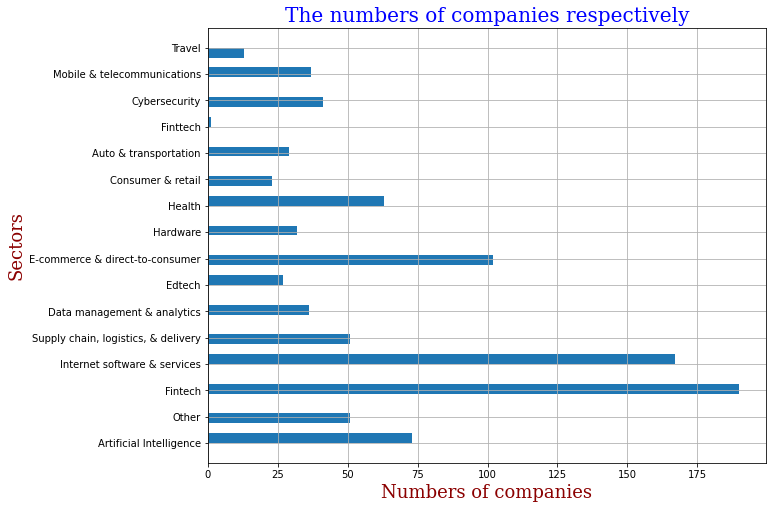

In [8]:
# define fontdict for labels
font1 = {'family':'serif','color':'blue','size':20} 
font2 = {'family':'serif','color':'darkred','size':18}

#create histogram unicorn companies 
plt.figure(figsize = (10, 8))
plt.hist(df.Industry, orientation = 'horizontal', bins = 40) 
plt.title('The numbers of companies respectively', fontdict = font1)

plt.xlabel('Numbers of companies', fontdict = font2)
plt.ylabel('Sectors', fontdict = font2)
plt.grid()
plt.show()

*According to horizontal histogram, the top sector is Fintech with over 140 companies, while Fintteck sector is the least with lower then about 5 companies*

### **Yearly companies joined unicorn club The World wide**

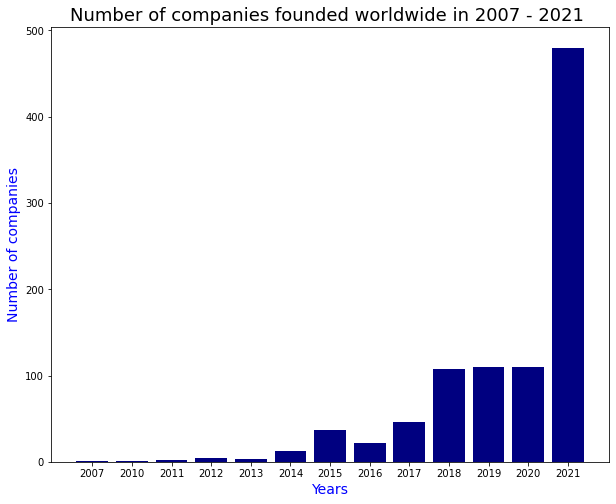

In [9]:
plt.figure(figsize = (10,  8))
list_of_companies = []

for i in sorted(df.year.unique()):
    list_of_companies.append(df[df.year == i].Company)

years = [str(year) for year in sorted(df.year.unique())]
companies = [len(company) for company in list_of_companies]
index = np.arange(len(years))
bar_width = 0.8
plt.bar(index, companies, bar_width, color = 'navy')
plt.xticks(index, years) # labels get centered
plt.title('Number of companies founded worldwide in 2007 - 2021 ', fontsize = 18)
plt.xlabel('Years', color = 'blue', fontsize = 14)
plt.ylabel('Number of companies', color = 'blue', fontsize = 14)
plt.show()


### **Yearly companies joined unicorn club by counrty**

In [10]:
len(df.Country.unique())
colors = plt.cm.Blues(np.linspace(0, 1, len(df.Country.unique())))

colors

array([[0.96862745, 0.98431373, 1.        , 1.        ],
       [0.95324875, 0.97447136, 0.99507882, 1.        ],
       [0.93479431, 0.96266052, 0.98917339, 1.        ],
       [0.91941561, 0.95281815, 0.98425221, 1.        ],
       [0.90096117, 0.9410073 , 0.97834679, 1.        ],
       [0.88558247, 0.93116494, 0.97342561, 1.        ],
       [0.86726644, 0.91935409, 0.96752018, 1.        ],
       [0.85250288, 0.90951173, 0.962599  , 1.        ],
       [0.83478662, 0.89770088, 0.95669358, 1.        ],
       [0.81707036, 0.88589004, 0.95078816, 1.        ],
       [0.80230681, 0.87604767, 0.94586697, 1.        ],
       [0.78459054, 0.86423683, 0.93996155, 1.        ],
       [0.76539792, 0.85411765, 0.93337947, 1.        ],
       [0.73587082, 0.84156863, 0.92304498, 1.        ],
       [0.7112649 , 0.83111111, 0.91443291, 1.        ],
       [0.68173779, 0.81856209, 0.90409842, 1.        ],
       [0.65221069, 0.80601307, 0.89376394, 1.        ],
       [0.62760477, 0.79555556,

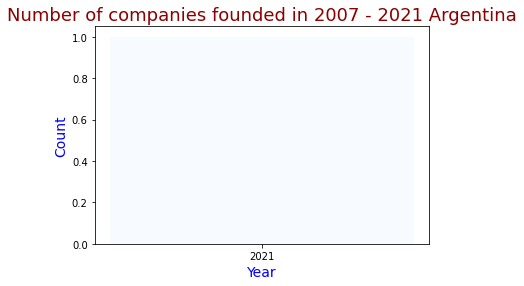

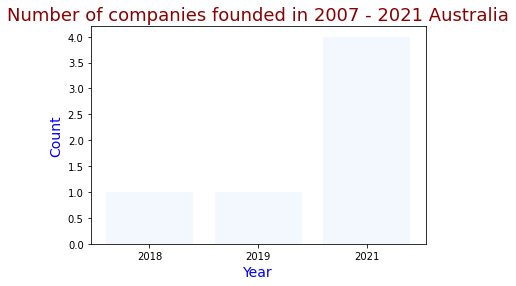

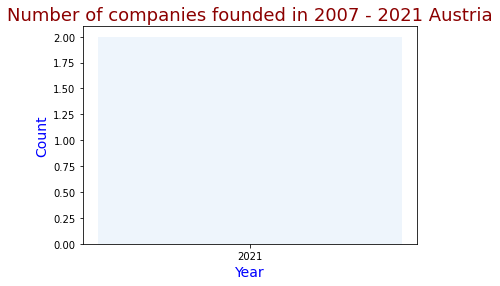

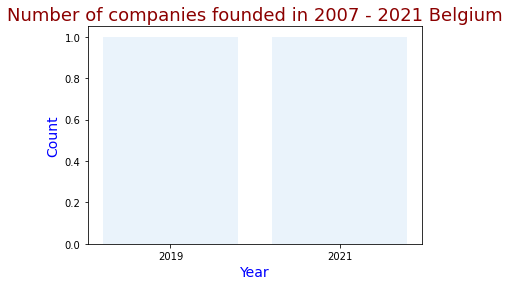

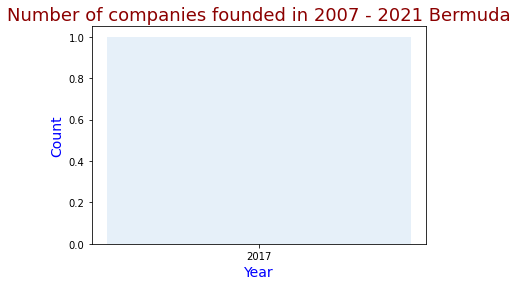

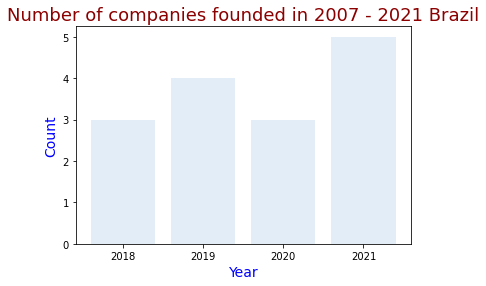

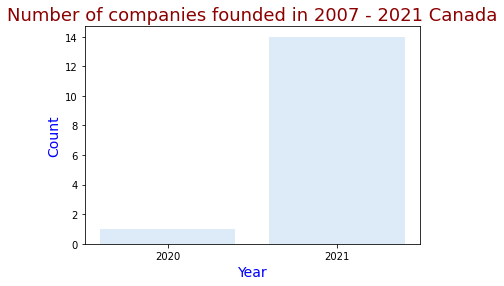

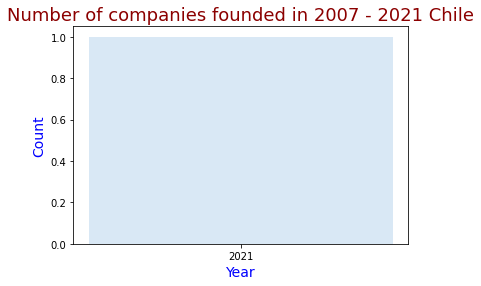

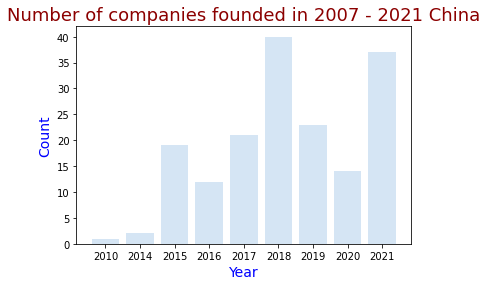

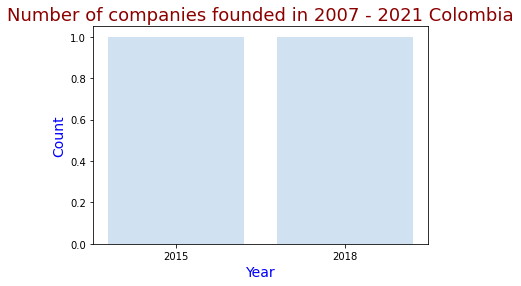

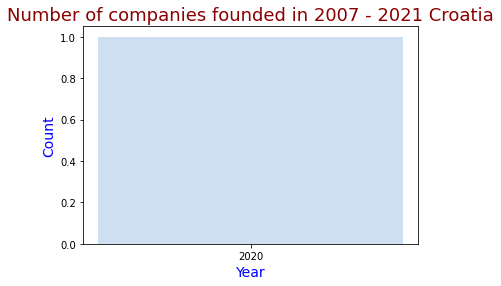

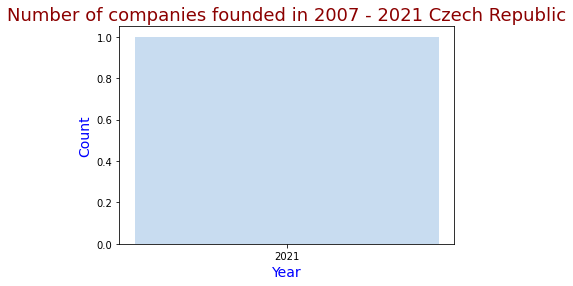

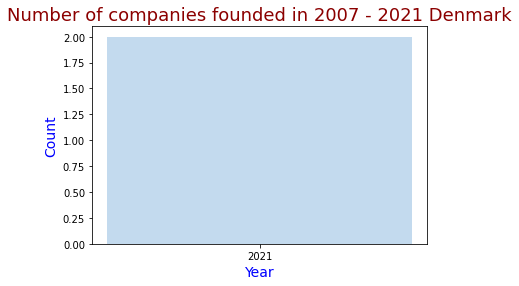

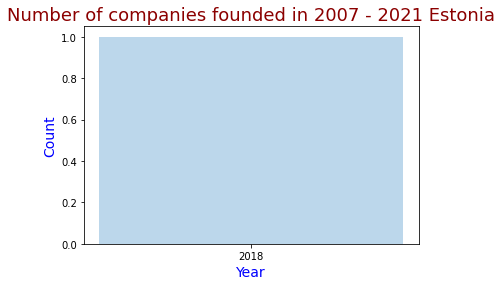

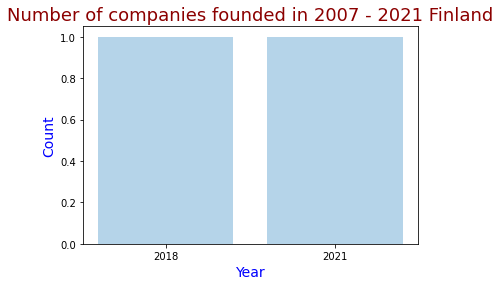

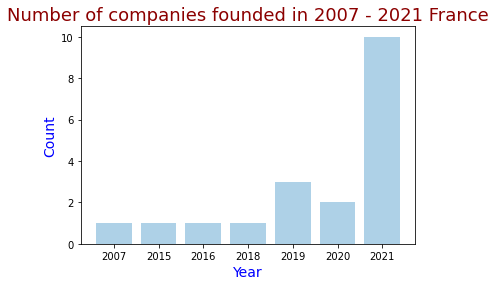

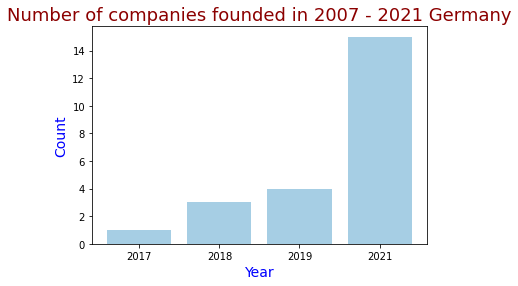

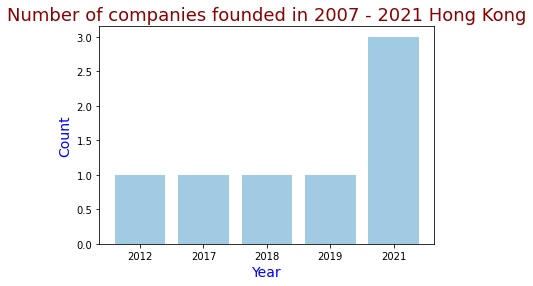

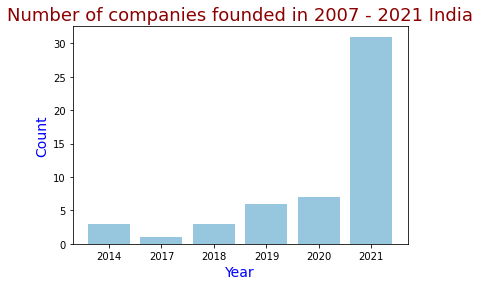

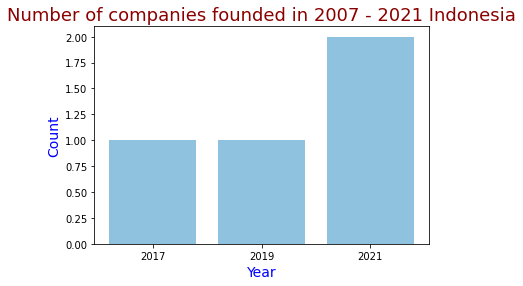

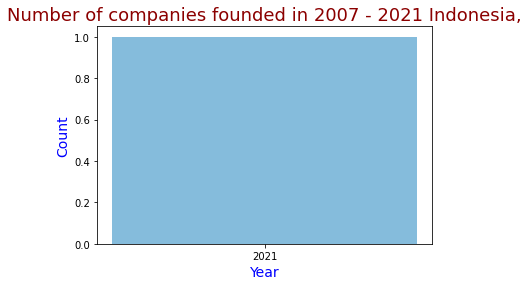

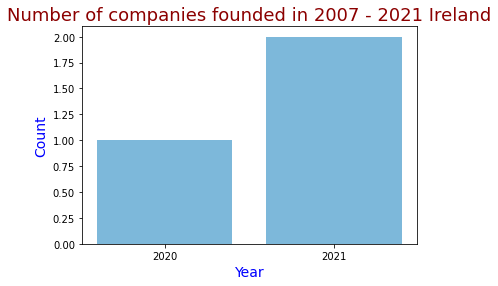

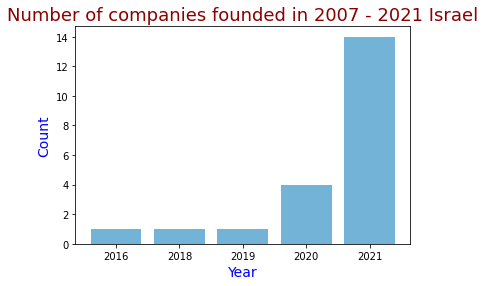

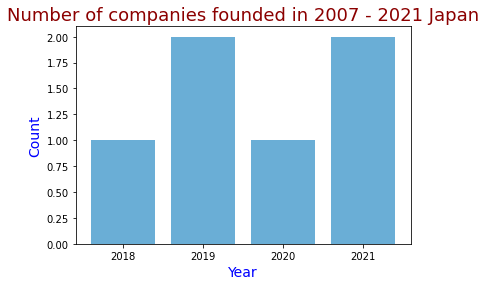

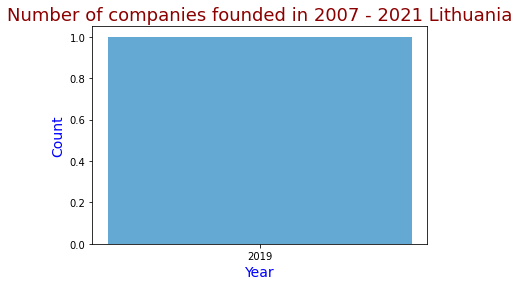

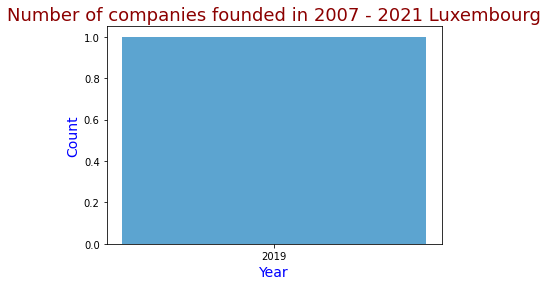

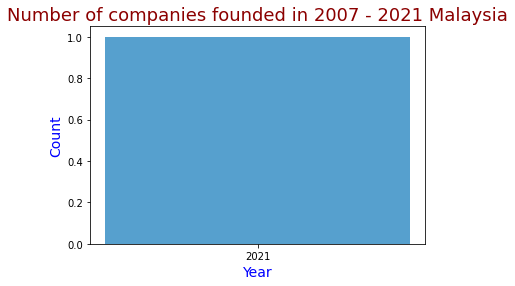

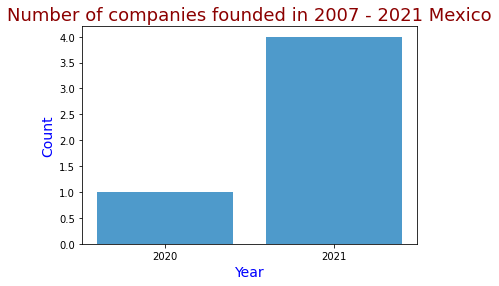

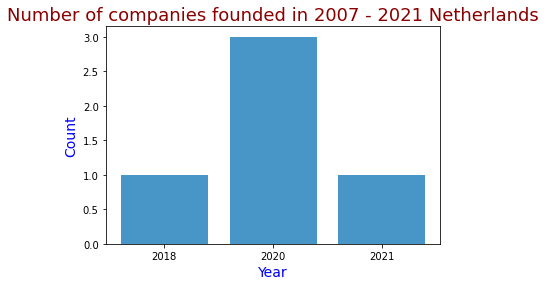

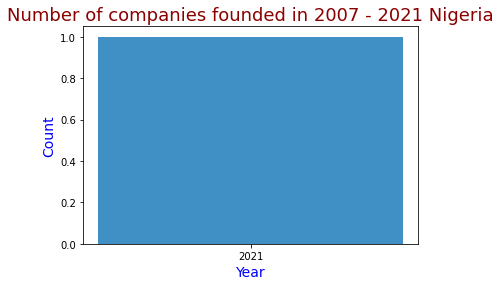

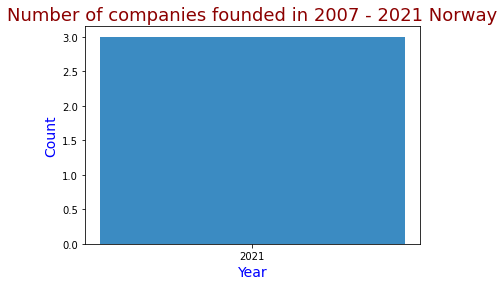

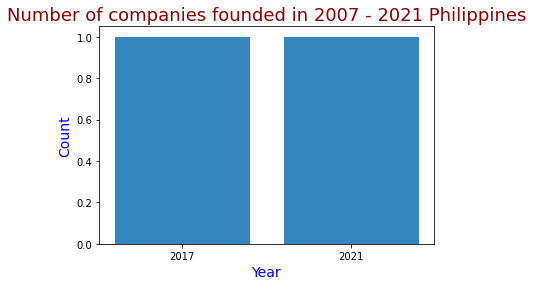

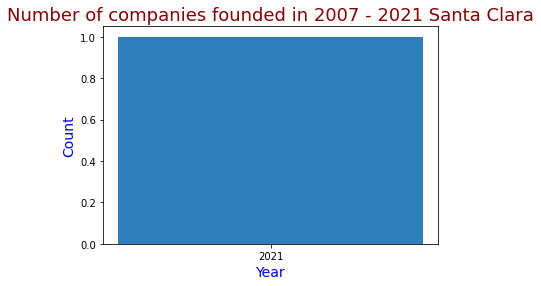

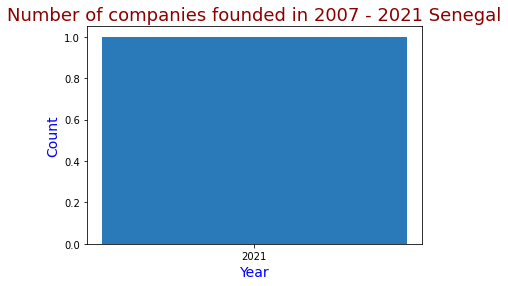

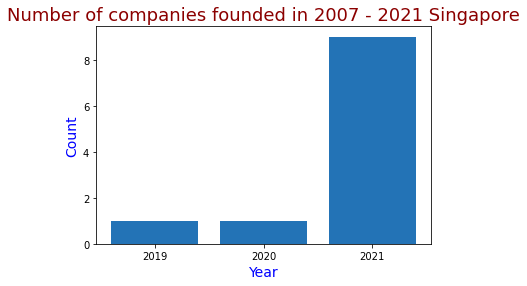

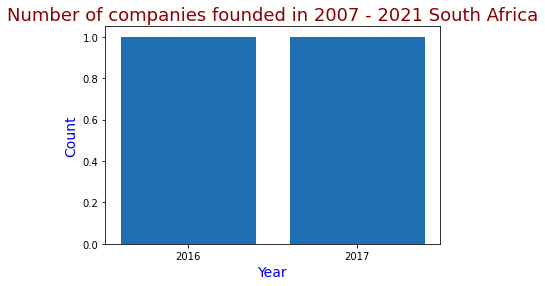

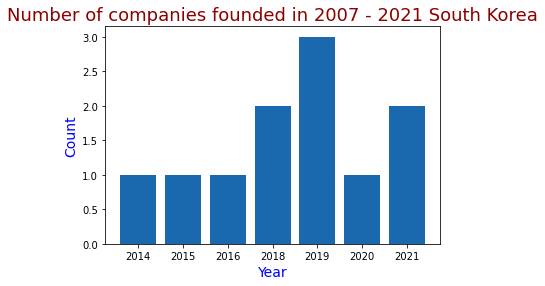

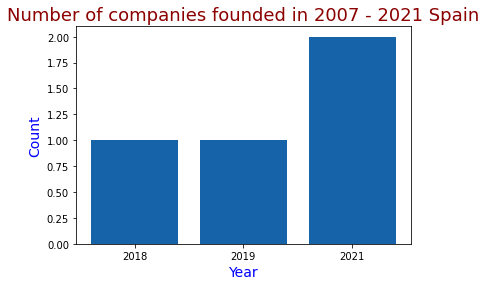

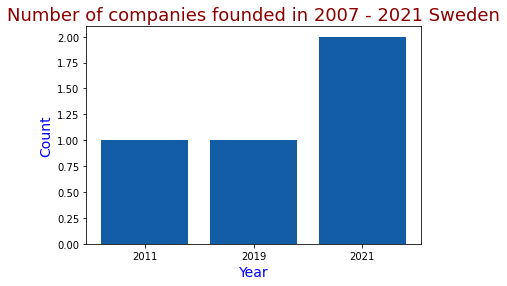

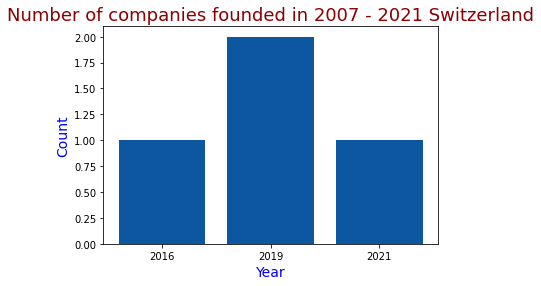

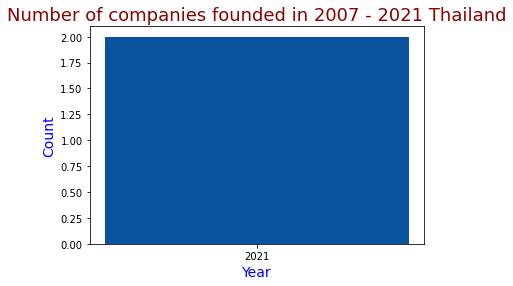

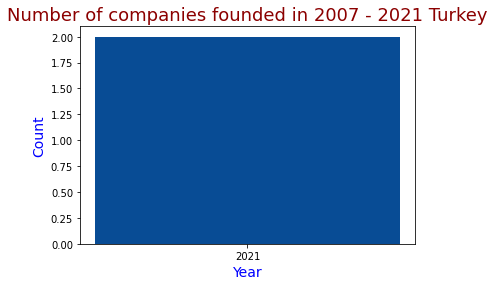

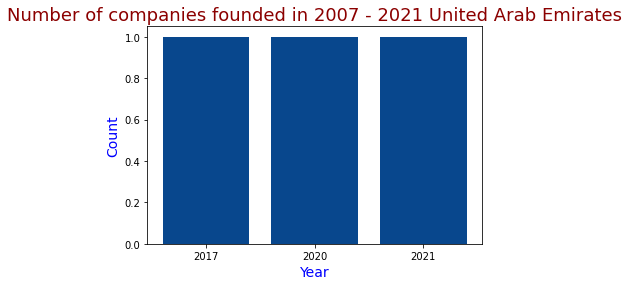

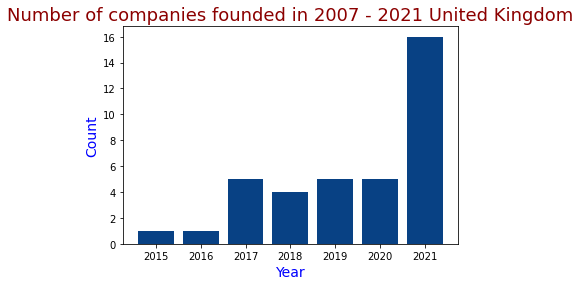

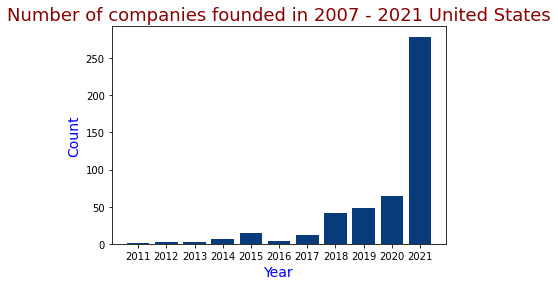

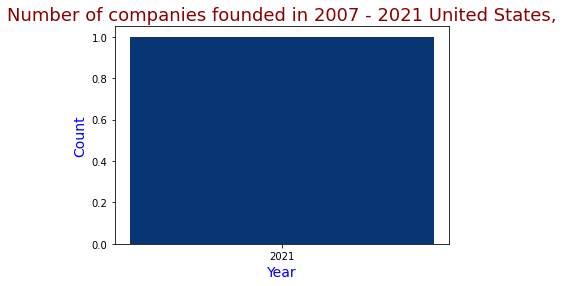

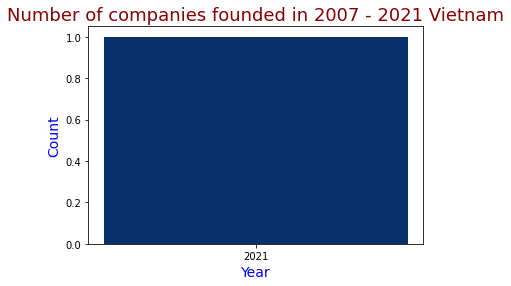

In [11]:
# create color list for every chart
colors = plt.cm.Blues(np.linspace(0, 1, len(df.Country.unique())))


# plot a histogram number of companies by country
for country, col in zip(sorted(df.Country.unique()), colors):
    df_country = df[df.Country == country]
    list_of_companies = []

    for i in sorted(df_country.year.unique()):
        list_of_companies.append(df_country[df_country.year == i].Company)

    years = [str(year) for year in sorted(df_country.year.unique())]
    companies = [len(company) for company in list_of_companies]
    index = np.arange(len(years))
    bar_width = 0.8
    plt.bar(index, companies, bar_width, color = col)
    plt.xticks(index, years) # labels get centered
    plt.title('Number of companies founded in 2007 - 2021 ' + country, fontsize = 18, color = 'darkred')
    plt.xlabel('Year', color = 'blue', fontsize = 14)
    plt.ylabel('Count', color = 'blue', fontsize = 14)
    plt.show()


### **Number of US startups count**

In [12]:
print('The number of US startups : ', len(df[df.Country == 'United States'].Country.tolist()))

The number of US startups :  477


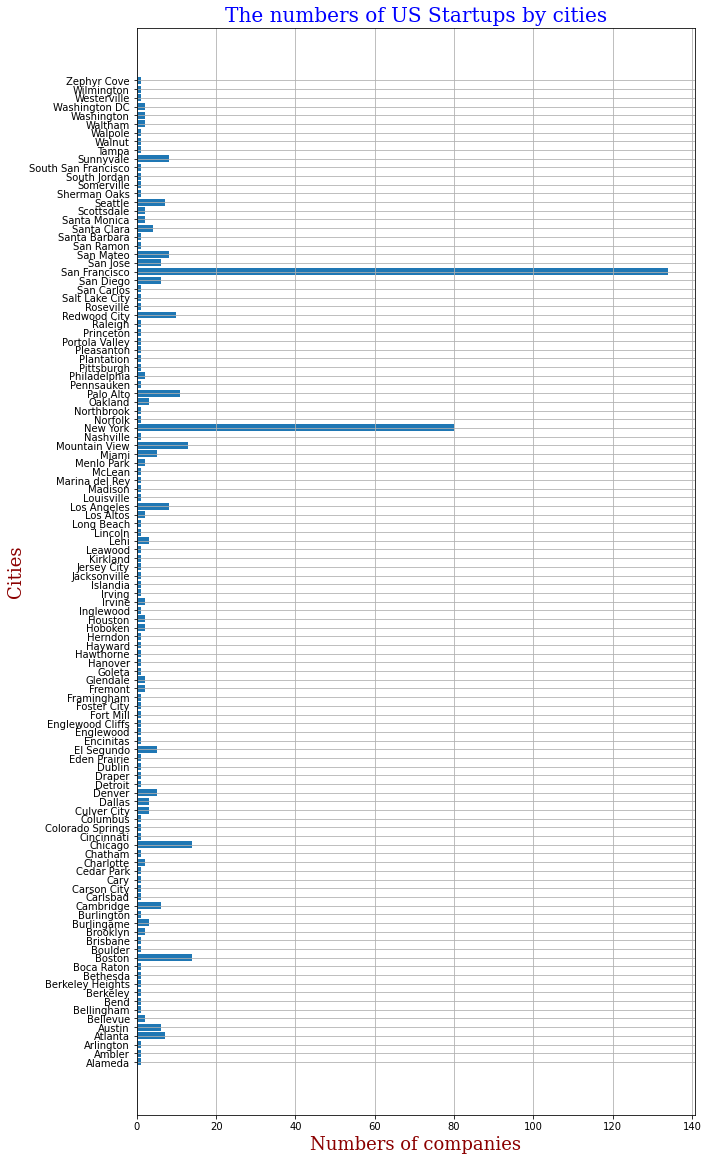

In [13]:
# number of US startups count by cities
plt.figure(figsize = (10, 20))
plt.barh(sorted(df[df.Country == 'United States'].City.unique()), [df[df.Country == 'United States'].City.tolist().count(city) for city in sorted(df[df.Country == 'United States'].City.unique())]) 
plt.title('The numbers of US Startups by cities', fontdict = font1)

plt.xlabel('Numbers of companies', fontdict = font2)
plt.ylabel('Cities', fontdict = font2)
plt.grid()
plt.show()

### **Line graph - US Based Companies**

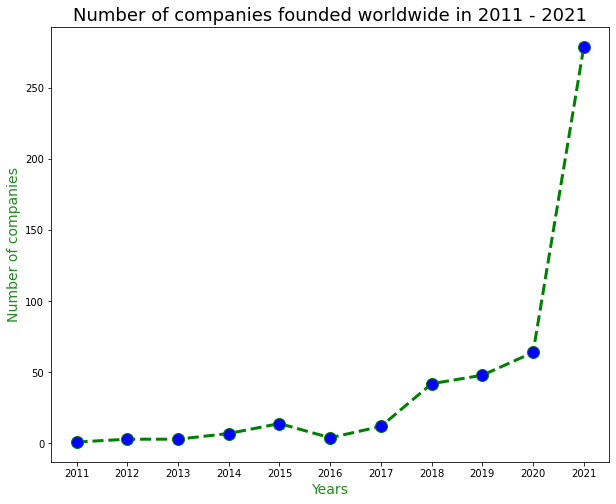

In [14]:
plt.figure(figsize = (10,  8))
list_of_companies = []
df_USA = df[df.Country == 'United States']
for i in sorted(df_USA.year.unique()):
    list_of_companies.append(df_USA[df_USA.year == i].Company)

years = [year for year in sorted(df_USA.year.unique())]
companies = [len(company) for company in list_of_companies]
index = np.arange(len(years))

plt.plot(index, companies, color = 'green', linestyle = 'dashed', linewidth = 3,
         marker = 'o', markerfacecolor = 'blue', markersize = 12)

plt.xticks(index, [str(i) for i in years]) # labels get centered
plt.title('Number of companies founded worldwide in ' + str(min(years)) + ' - ' + str(max(years)), fontsize = 18)
plt.xlabel('Years', color = 'forestgreen', fontsize = 14)
plt.ylabel('Number of companies', color = 'forestgreen', fontsize = 14)
plt.show()


### **Extract some columns from US_unicorn startups**

In [15]:
df_USA = df[df.Country == 'United States'][['Company', 'Valuation', 'Date', 'Country', 'City', 'Industry', 'Investors']]

df_USA

,Company,Valuation,Date,Country,City,Industry,Investors
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm..."
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm..."
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm..."
...,...,...,...,...,...,...,...
929,Lessen,1.0,11/30/2021,United States,Scottsdale,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
931,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
932,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
933,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."


In [16]:
df_USA.reset_index(drop=True, inplace=True)

df_USA

,Company,Valuation,Date,Country,City,Industry,Investors
0,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm..."
1,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
2,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm..."
3,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."
4,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm..."
...,...,...,...,...,...,...,...
472,Lessen,1.0,11/30/2021,United States,Scottsdale,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
473,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
474,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
475,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."


### **How many fintech comapny in the US?**


In [17]:
print('Finteck company list\n\n', df_USA[df_USA.Industry == 'Fintech'].Company.tolist())
print()
print('The number of fintech companies in the US : ', len(df_USA[df_USA.Industry == 'Fintech'].Industry.tolist()))

Finteck company list

 ['Stripe', 'Chime', 'Plaid Technologies', 'Brex', 'Ripple', 'Gusto', 'Tipalti', 'Fireblocks', 'Carta', 'Gemini', 'Better.com', 'Bolt', 'Deel', 'Zenefits', 'Chainalysis', 'Next Insurance', 'iCapital Network', 'Ramp Financial', 'FalconX', 'Alchemy', 'MoonPay', 'Upgrade', 'Cedar', 'ConsenSys', 'SpotOn', 'HighRadius', 'Circle', 'BlockFi', 'Celsius Network', 'TradingView', 'Kraken', 'DriveWealth', 'Tradeshift', 'Varo Bank', 'Paxos', 'Trumid', 'Greenlight', 'Current', 'Addepar', 'ReCharge', 'Unqork', 'Ethos Technologies', 'Pipe', 'Divvy Homes', 'Modern Treasury', 'MX Technologies', 'CFGI', 'ZenBusiness', 'Extend', 'Mercury', 'HomeLight', 'Collective Health', 'Snapdocs', 'Chipper Cash', 'TaxBit', 'Pacaso', 'candy.com', 'CoinList', 'Zeta', 'M1 Finance', 'Symphony', 'Stash', 'ChargeBee Technologies', 'At-Bay', 'Alloy', 'Signifyd', 'Betterment', 'BlockDaemon', 'Public', 'Pilot.com', 'FloQast', 'DailyPay', 'AgentSync', 'Guideline', 'Ivalua', 'Sunbit', 'Fundbox', 'Tresata', 

### **Most valued unicorn based country**

In [18]:
for country in df.Country.unique():
    print('The most values unicon is {} in {}.'.format(df[df.Country == country].sort_values('Valuation', ascending=False)['Company'].tolist()[0], country))

The most values unicon is Bytedance in China.
The most values unicon is SpaceX in United States.
The most values unicon is Klarna in Sweden.
The most values unicon is Canva in Australia.
The most values unicon is Revolut in United Kingdom.
The most values unicon is Nubank in Brazil.
The most values unicon is FTX in Hong Kong.
The most values unicon is BYJU's in India.
The most values unicon is J&T Express in Indonesia.
The most values unicon is Celonis in Germany.
The most values unicon is Kavak in Mexico.
The most values unicon is Dapper Labs in Canada.
The most values unicon is Getir in Turkey.
The most values unicon is Toss in South Korea.
The most values unicon is Mollie in Netherlands.
The most values unicon is Wiz in Israel.
The most values unicon is Rappi in Colombia.
The most values unicon is Collibra in Belgium.
The most values unicon is Vinted in Lithuania.
The most values unicon is Bolt in Estonia.
The most values unicon is Sorare in France.
The most values unicon is BitPand

In [19]:
How you can access a specific company?
Based on valuation which company has most valuation?
Which city has most valuation startups in world?

Object `company` not found.
Object `valuation` not found.
Object `world` not found.
